In [2]:
from operator import attrgetter
from datetime import datetime, timedelta

import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

import cartopy.crs as ccrs
import cartopy.feature as cf

In [3]:
# Parameters

##### release position 
release_zone = "test_001"
bathymodiolus_delta_lat = 0.08  #change??

release_depth = 20

# release particles
number_particles = 100

# release timing
release_time_in_days = 1   # e.g. from 01/01/2009 to 03/01/2009 
start_year = 2009
start_month = 1
start_day = 1

# experiment duration etc
runtime_in_days = 5
dt_in_minutes = 60

# particle positions are stored every x hours 
outputdt_in_hours = 24

# release location file
release_locations_file = "../data/config/test_stations.csv"

# location of input data
data_path = '/gxfs_work1/geomar/smomw044/prep_data_iAtlantic_LMock/'
experiment_name = 'INALT20.L46-KFS119' 
data_resolution = '1d'

# location of output data
outpath = f'../output_data/{experiment_name}'
output_filename = '{release_zone}_{start_year}{start_month:02d}{start_day:02d}_RT-{runtime_in_days}_N-{number_particles}_seed-{RNG_seed}.nc'

# how to initialize the random number generator
RNG_seed = 12345


### Construct input / output paths etc.

In [6]:
outpath = Path(outpath)
output_filename = output_filename.format(
    release_zone = release_zone,
    RNG_seed=RNG_seed,
    start_year=start_year,
    start_month = start_month,
    start_day = start_day,
    runtime_in_days = runtime_in_days,
    number_particles=number_particles
)
outfile = outpath / output_filename

In [7]:
particle_ds = xr.open_dataset(outfile)
particle_ds

<xarray.Dataset>
Dimensions:     (traj: 100, obs: 7)
Dimensions without coordinates: traj, obs
Data variables:
    lon         (traj, obs) float64 ...
    lat         (traj, obs) float64 ...
    z           (traj, obs) float64 ...
    time        (traj, obs) datetime64[ns] ...
    trajectory  (traj, obs) float64 ...
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.3.1
    parcels_mesh:           spherical

In [20]:
test = particle_ds.isel(traj=slice(0,99,10))
start = test.isel(obs=0)

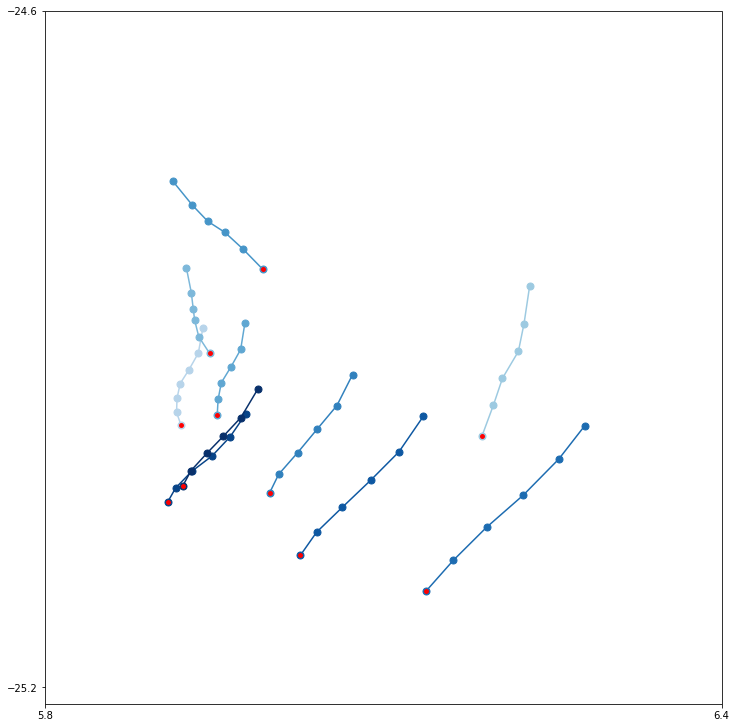

In [33]:


fig, ax = plt.subplots(1,1,figsize=(10,10),constrained_layout=True,
                      subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.set_prop_cycle('color',plt.cm.Blues(np.linspace(0.3,1,10)))
ax.coastlines(resolution='10m')
ax.add_feature(cf.BORDERS)
ax.add_feature(cf.LAND, facecolor='#8e9497ff')#(138, 145, 149, 1.00)
ax.set_extent([test["lon"].min()-0.1,test["lon"].max()+0.1,
               test["lat"].min()-0.1,test["lat"].max()+0.1], crs=ccrs.PlateCarree())
ax.plot(test['lon'].T,test['lat'].T,
        zorder=2,marker='o',markersize=7)
ax.scatter(start['lon'],start['lat'],s=15,color='red',zorder=2)
#ax.add_patch(Rectangle((1.991481085-dlon, 51.0044913), 2*dlon, dlat,color='red'))

ax.set_xticks([5.8,6.4])
#ax.set_xticklabels(['1°E','1.5°E','2°E','2.5°E','3°E'],fontsize=14, family='Arial')
ax.set_yticks([-24.6,-25.2])
#ax.set_yticklabels(['50.5°N','51°N','51.5°N','52°N','52.5°N'],fontsize=14, family='Arial')

plt.show()